<a href="https://colab.research.google.com/github/ngcheeyuan/Classification_projects/blob/main/cifar10_classification_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import tensorflow_datasets as tensorflow_datasets
import matplotlib.pyplot as plt
from tensorflow.keras import layers
import numpy as np
import tensorflow_datasets as tfds
from sklearn.metrics import classification_report
from matplotlib.pyplot import imshow
from sklearn.model_selection import train_test_split

In [2]:
(train_images , train_labels) , (test_images,test_labels) = tf.keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 4s 0us/step


In [3]:
train_images , val_images , train_labels , val_labels = train_test_split(train_images,
                                                                         train_labels,
                                                                         test_size = 0.25,
                                                                         shuffle = True)

In [4]:
BATCH_SIZE = 32 
classnames = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

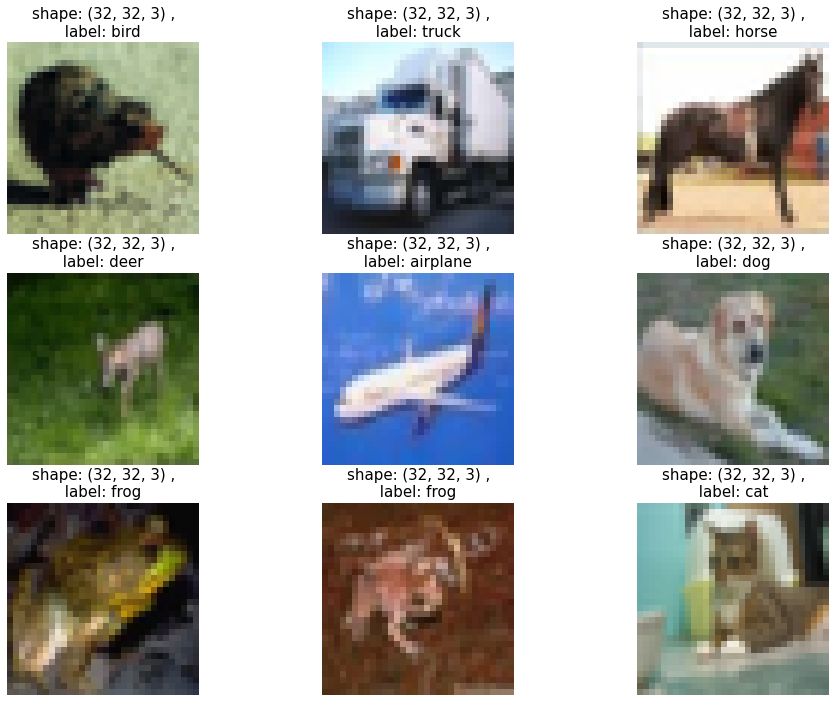

In [5]:
import random
random_index = random.randint(0,(len(train_images)-9))
plt.figure(figsize = (16,12))
for i in range(1,10):
  plt.subplot(3,3,i)
  plt.imshow(train_images[random_index+i])
  plt.title(f"shape: {train_images[random_index+i].shape} ,\n label: {classnames[train_labels[random_index+i][0]]} " , fontsize = 15)
  plt.axis(False)

## Prepare dataset for faster processing

In [6]:
def preprocessing_func(images,labels):
  images = tf.cast(images/255,dtype = tf.float32)
  #labels = tf.cast(labels,dtype = tf.float32)

  image_data = tf.data.Dataset.from_tensor_slices(images)
  feature_data = tf.data.Dataset.from_tensor_slices(labels)
  dataset = tf.data.Dataset.zip((image_data,feature_data))
  dataset = dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

  return dataset

In [7]:
train_dataset = preprocessing_func(train_images,train_labels)
val_dataset = preprocessing_func(val_images,val_labels)
test_dataset = preprocessing_func(test_images,test_labels)

In [8]:
train_images.shape ,train_labels.shape

((37500, 32, 32, 3), (37500, 1))

In [9]:
train_dataset , val_dataset, test_dataset

(<PrefetchDataset shapes: ((None, 32, 32, 3), (None, 1)), types: (tf.float32, tf.uint8)>,
 <PrefetchDataset shapes: ((None, 32, 32, 3), (None, 1)), types: (tf.float32, tf.uint8)>,
 <PrefetchDataset shapes: ((None, 32, 32, 3), (None, 1)), types: (tf.float32, tf.uint8)>)

In [10]:
len(train_dataset)

1172

## Model 0:

In [11]:
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

In [12]:
data_augmentation = tf.keras.Sequential([
                                         preprocessing.RandomHeight(0.2),
                                         preprocessing.RandomWidth(0.2),
                                         preprocessing.RandomRotation(0.2),
                                         preprocessing.RandomFlip('horizontal')
                                        
] , name = 'data_augmentation')

In [13]:
input = layers.Input(shape = (32,32,3), name = 'input_layer')
x =  layers.Conv2D(32, (3, 3), activation='relu')(input)
x = (layers.MaxPooling2D((2, 2)))(x)
x = (layers.Conv2D(64, (3, 3), activation='relu'))(x)
x = (layers.MaxPooling2D((2, 2)))(x)
x = (layers.Conv2D(64, (3, 3), activation='relu'))(x)
x = (layers.Flatten())(x)
x = (layers.Dense(64, activation='relu'))(x)
output =(layers.Dense(10 , activation = 'softmax'))(x)

model_0 = tf.keras.Model(inputs = input,
                         outputs = output , name = 'Model_0')

model_0.compile(optimizer= tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [14]:
model_0.summary()

Model: "Model_0"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          3692

In [ ]:
filepath = 'model_checkpoints'
history_0 = model_0.fit(train_dataset,
                        epochs=10, 
                        validation_data=(val_dataset),
                        callbacks = [tf.keras.callbacks.EarlyStopping(patience = 2,
                                                                      restore_best_weights = True,
                                                                      min_delta = 0.01),
                                     tf.keras.callbacks.ModelCheckpoint(filepath = 'model_checkpoints',
                                                                        save_best_only = True)])


Epoch 1/10
1172/1172 [==============================] - 50s 43ms/step - loss: 1.9312 - accuracy: 0.2771 - val_loss: 1.6231 - val_accuracy: 0.4022
Epoch 2/10
1172/1172 [==============================] - 51s 44ms/step - loss: 1.5220 - accuracy: 0.4422 - val_loss: 1.4238 - val_accuracy: 0.4806
Epoch 3/10
1172/1172 [==============================] - 53s 45ms/step - loss: 1.3356 - accuracy: 0.5214 - val_loss: 1.2754 - val_accuracy: 0.5382
Epoch 4/10
1172/1172 [==============================] - 97s 83ms/step - loss: 1.2048 - accuracy: 0.5728 - val_loss: 1.2048 - val_accuracy: 0.5698
Epoch 5/10
1172/1172 [==============================] - 49s 42ms/step - loss: 1.1019 - accuracy: 0.6107 - val_loss: 1.1599 - val_accuracy: 0.5928
Epoch 6/10
1172/1172 [==============================] - 49s 42ms/step - loss: 1.0196 - accuracy: 0.6405 - val_loss: 1.1155 - val_accuracy: 0.6138
Epoch 7/10
1172/1172 [==============================] - 49s 42ms/step - loss: 0.9535 - accuracy: 0.6645 - val_loss: 1.0798 -

In [ ]:
model_0 = tf.keras.models.load_model('/content/model_checkpoints')

In [ ]:
model_0.evaluate(val_dataset)

In [ ]:
preds_probs = model_0.predict(val_dataset)
preds = np.argmax(preds_probs, axis = 1)

In [ ]:
tf.squeeze(val_labels).numpy()

In [ ]:
def plot_results(model,preds,val_labels):
  df = pd.DataFrame(classification_report(preds , val_labels,output_dict = True)).rename(columns = {f'{i}':classnames[i] for i in range(0,10)}).T
  df = df.sort_values(by = 'f1-score' , ascending = False)
  plt.figure(figsize=(10,7))
  plt.barh(df.index , df['f1-score'])
  plt.xlabel('f1-score');
  plt.title(f'F1-score for each classes for : {model.name}')

In [ ]:
def plot_loss_curves(history):
  df = pd.DataFrame(history_0.history)
  df['epoch'] = df.index
  plt.figure(figsize = (12,6))
  plt.subplot(1,2,1)
  plt.plot(df.epoch , df.val_accuracy , label = 'val_accuracy')
  plt.plot(df.epoch , df.accuracy , label = 'accuracy')
  plt.legend()

  plt.subplot(1,2,2)
  plt.plot(df.epoch , df.val_loss , label = 'val_loss')
  plt.plot(df.epoch , df.loss , label = 'loss')
  plt.legend()


In [ ]:
plot_loss_curves(history_0)

In [ ]:
plot_results(model_0,preds , tf.squeeze(val_labels).numpy())

In [ ]:
predicted_probabilities = np.max(preds_probs , axis = 1)
prediction_df = pd.DataFrame({'images': list(val_images),
                'predicted_probabilities':predicted_probabilities,
                'true_labels': tf.squeeze(val_labels).numpy(),
                'predicted_labels': preds,
                'true_class':[classnames[i] for i in tf.squeeze(val_labels).numpy()],
                'pred_class':[classnames[i] for i in preds]})

In [ ]:
top_100_wrong_predictions = prediction_df[prediction_df.true_labels!=prediction_df.predicted_labels].sort_values(by = 'predicted_probabilities').tail(100).reset_index(drop = True)

In [ ]:
random_index = random.randint(0,100-9)
plt.figure(figsize = (16,16))
for index,row in enumerate(top_100_wrong_predictions[random_index:random_index+9].itertuples(),1):
  _,images,probs,_,_,true_class,pred_class = row
  plt.subplot(3,3,index)
  imshow(images)
  plt.title(f'pred_probs: {probs}, \n true_label : {true_class} \n pred_class: {pred_class}', color = 'r')
  plt.axis(False)

## Model 1: EfficientNetB0 - non-trainable

In [ ]:
input_shape = (32,32,3)
base_model = tf.keras.applications.EfficientNetB0(include_top = False)
base_model.trainable = False
inputs = layers.Input(shape =input_shape , name = 'input_layer')
x = base_model(inputs,training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(len(classnames))(x)
outputs = layers.Activation('softmax', dtype = tf.float32 , name = 'softmax_float32')(x)
model_1 = tf.keras.Model(inputs,outputs)

# compile the model
model_1.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ['accuracy'])

In [ ]:
model_1.summary()

In [ ]:
history_1 = model_1.fit(train_dataset,
                        epochs=10, 
                        validation_data=(val_dataset),
                        callbacks = [tf.keras.callbacks.EarlyStopping(patience = 2,
                                                                      restore_best_weights = True,
                                                                      min_delta = 0.01),
                                     tf.keras.callbacks.ModelCheckpoint(filepath = 'model_checkpoints',
                                                                        save_best_only = True)])

In [ ]:
model_1 = tf.keras.models.load_model('model_checkpoints')

In [ ]:
model_1.evaluate(val_dataset)

In [ ]:
preds_probs = model_1.predict(val_dataset)
preds = np.argmax(preds_probs, axis = 1)

In [ ]:
plot_loss_curves(history_1)

In [ ]:
plot_results(model_1,preds , tf.squeeze(val_labels).numpy())

In [ ]:
predicted_probabilities = np.max(preds_probs , axis = 1)
prediction_df = pd.DataFrame({'images': list(val_images),
                'predicted_probabilities':predicted_probabilities,
                'true_labels': tf.squeeze(val_labels).numpy(),
                'predicted_labels': preds,
                'true_class':[classnames[i] for i in tf.squeeze(val_labels).numpy()],
                'pred_class':[classnames[i] for i in preds]})

In [ ]:
top_100_wrong_predictions = prediction_df[prediction_df.true_labels!=prediction_df.predicted_labels].sort_values(by = 'predicted_probabilities').tail(100).reset_index(drop = True)

In [ ]:
random_index = random.randint(0,100-9)
plt.figure(figsize = (16,16))
for index,row in enumerate(top_100_wrong_predictions[random_index:random_index+9].itertuples(),1):
  _,images,probs,_,_,true_class,pred_class = row
  plt.subplot(3,3,index)
  imshow(images)
  plt.title(f'pred_probs: {probs}, \n true_label : {true_class} \n pred_class: {pred_class}', color = 'r')
  plt.axis(False)